In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('advertising.csv')
df.shape

(1000, 10)

In [3]:
df.head(10)

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
5,59.99,23,59761.56,226.74,Sharable client-driven software,Jamieberg,1,Norway,2016-05-19 14:30:17,0
6,88.91,33,53852.85,208.36,Enhanced dedicated support,Brandonstad,0,Myanmar,2016-01-28 20:59:32,0
7,66.00,48,24593.33,131.76,Reactive local challenge,Port Jefferybury,1,Australia,2016-03-07 01:40:15,1
8,74.53,30,68862.00,221.51,Configurable coherent function,West Colin,1,Grenada,2016-04-18 09:33:42,0
9,69.88,20,55642.32,183.82,Mandatory homogeneous architecture,Ramirezton,1,Ghana,2016-07-11 01:42:51,0


In [4]:
df.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


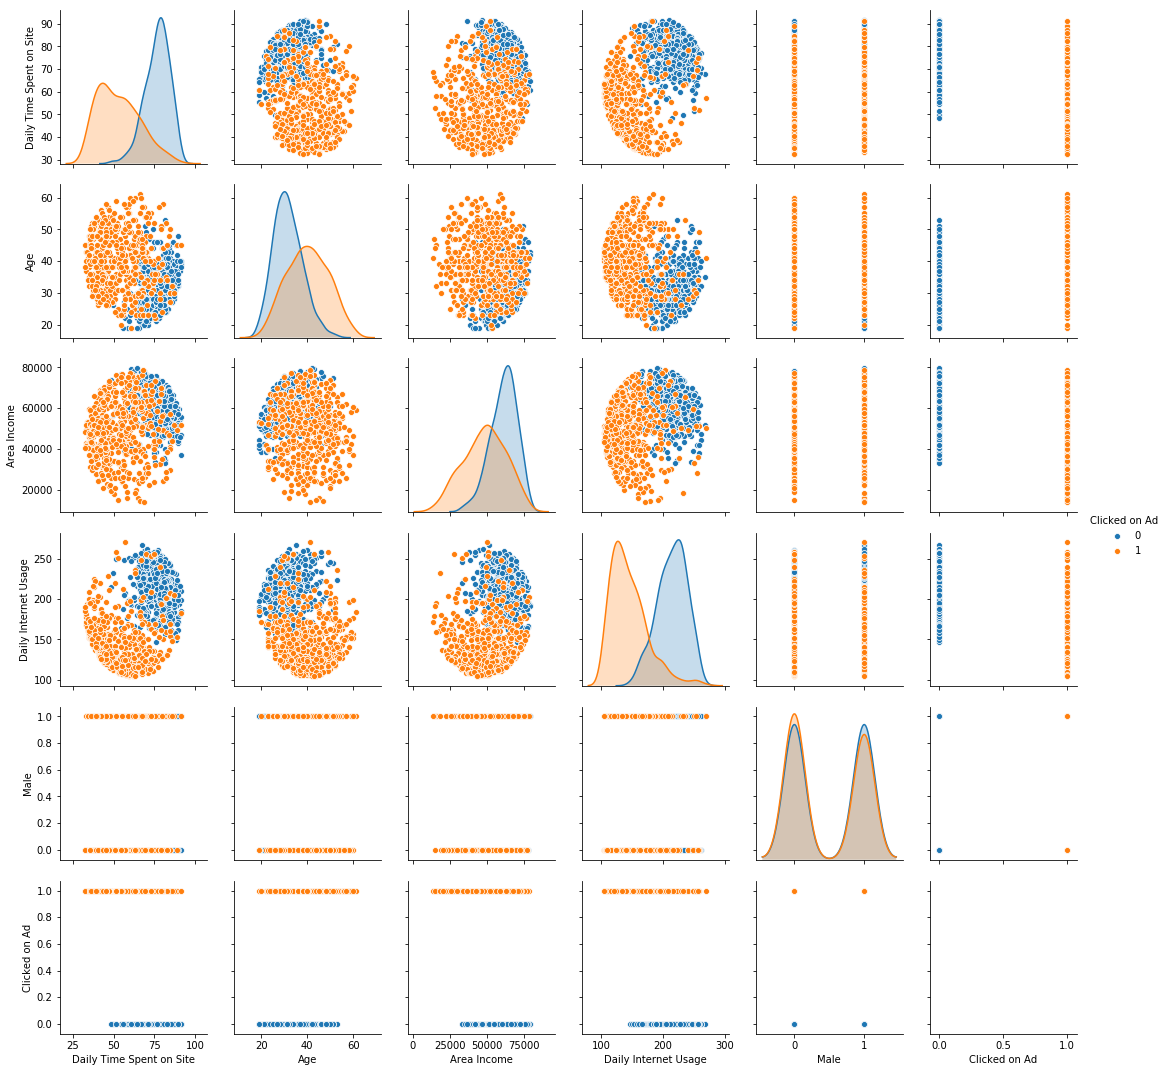

In [7]:
sns.pairplot(df, hue="Clicked on Ad")

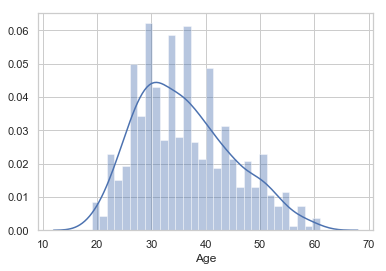

In [12]:
#plt.figure(figsize=(6,6))
sns.set(style='whitegrid')
sns.distplot(df['Age'], bins=30, kde=True)

It is observed that People between age 25 and 45 years use the sites more 

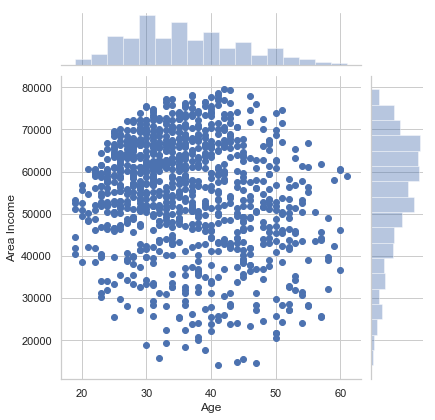

In [13]:
sns.jointplot(x='Age',y='Area Income',data=df)

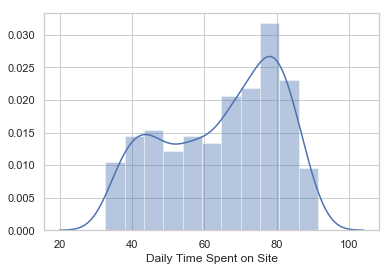

In [14]:
sns.distplot(df['Daily Time Spent on Site'])

It is observed that usually people spend much time on site i.e around 80 mins 

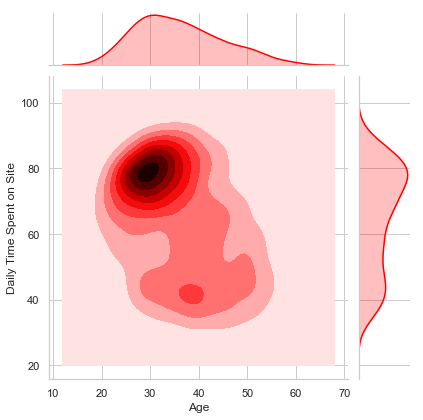

In [16]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=df, color='red', kind='kde')

It is observed that people around age 25 to 35 years spend much time on site compared to people of other ages

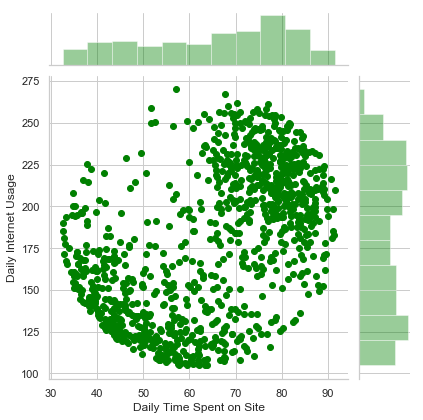

In [17]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage', data=df, color='green')

In [148]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']] , df['Clicked on Ad'],
                                                    test_size=0.3, random_state=101)

In [149]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700, 5)
(300, 5)
(700,)
(300,)


In [151]:
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix, classification_report
import time 

model = LogisticRegression()
start = time.process_time()

model.fit(X_train,y_train)
first_model_time = time.process_time()-start
print(time.process_time()-start)

pred = model.predict(X_test)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

first_model_score = model.score(X_test,y_test)
print(model.score(X_test,y_test))

0.009141999999997097
[[149   8]
 [ 15 128]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93       157
           1       0.94      0.90      0.92       143

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

0.9233333333333333


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Above model is trained with very simple data, we have not considered string type features

### Handling object data types features

In [152]:
df_copy = df.select_dtypes(include=['object']).copy()

df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
Ad Topic Line    1000 non-null object
City             1000 non-null object
Country          1000 non-null object
Timestamp        1000 non-null object
dtypes: object(4)
memory usage: 31.3+ KB


In [153]:
print('Number of Different cities in data set:')
print(len(df_copy['City'].value_counts()))

print('Number of Different Countries in data set:')
print(len(df_copy['Country'].value_counts()))


Number of Different cities in data set:
969
Number of Different Countries in data set:
237


#### Handling categorical variables

Since number of levels in category variables city, country are high, we will perform binary encoding for these categories

Advantage of Binary encoding is that it does not create too many new columns like label encoding or one-hot-encoding

In [154]:
# Binary encoding city,country columns

import category_encoders as ce
encoders = ce.BinaryEncoder(cols=['City','Country'])
df_binary = encoders.fit_transform(df_copy)

print(df_binary.head())

                           Ad Topic Line  City_0  City_1  City_2  City_3  \
0     Cloned 5thgeneration orchestration       0       0       0       0   
1     Monitored national standardization       0       0       0       0   
2       Organic bottom-line service-desk       0       0       0       0   
3  Triple-buffered reciprocal time-frame       0       0       0       0   
4          Robust logistical utilization       0       0       0       0   

   City_4  City_5  City_6  City_7  City_8  ...  Country_0  Country_1  \
0       0       0       0       0       0  ...          0          0   
1       0       0       0       0       0  ...          0          0   
2       0       0       0       0       0  ...          0          0   
3       0       0       0       0       1  ...          0          0   
4       0       0       0       0       1  ...          0          0   

   Country_2  Country_3  Country_4  Country_5  Country_6  Country_7  \
0          0          0          0     

It is observed that 11 columns have been created for cities and 9 columns created for countries Which is very less columns for levels we observed

#### Handling texts features

data type of 'feature Ad Topic Line' is also Object only but its a free text,its not categories so we need to do text processing to convert text to vectors

In [155]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

ps = PorterStemmer()
lm = WordNetLemmatizer()

add_topic_lines = df[['Ad Topic Line']]
print(add_topic_lines.shape)

corpus = []
for i in range(0,len(add_topic_lines)):
    topic_line = re.sub('[^a-zA-Z0-9]',' ', add_topic_lines['Ad Topic Line'][i])
    topic_line = topic_line.lower()
    topic_line = topic_line.split() 
    
    topic_line = [lm.lemmatize(word) for word in topic_line if word not in set(stopwords.words('english'))]

    topic_line = ' '.join(topic_line)
    
    corpus.append(topic_line)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/praveen/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


(1000, 1)


In [156]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()
text_vectors = cv.fit_transform(corpus)

X = pd.DataFrame(text_vectors.A, columns=cv.get_feature_names())
print(X.columns)
X.head()

Index(['24', '24hour', '3rdgeneration', '4thgeneration', '5thgeneration',
       '6thgeneration', 'ability', 'access', 'actuating', 'adapter',
       ...
       'visionary', 'volatile', 'warehouse', 'web', 'website', 'well', 'wide',
       'workforce', 'worthy', 'zero'],
      dtype='object', length=338)


,24,24hour,3rdgeneration,4thgeneration,5thgeneration,6thgeneration,ability,access,actuating,adapter,...,visionary,volatile,warehouse,web,website,well,wide,workforce,worthy,zero
0,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [157]:
print(df_binary.info())
df_binary = df_binary.join(X)
df_binary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 22 columns):
Ad Topic Line    1000 non-null object
City_0           1000 non-null int64
City_1           1000 non-null int64
City_2           1000 non-null int64
City_3           1000 non-null int64
City_4           1000 non-null int64
City_5           1000 non-null int64
City_6           1000 non-null int64
City_7           1000 non-null int64
City_8           1000 non-null int64
City_9           1000 non-null int64
City_10          1000 non-null int64
Country_0        1000 non-null int64
Country_1        1000 non-null int64
Country_2        1000 non-null int64
Country_3        1000 non-null int64
Country_4        1000 non-null int64
Country_5        1000 non-null int64
Country_6        1000 non-null int64
Country_7        1000 non-null int64
Country_8        1000 non-null int64
Timestamp        1000 non-null object
dtypes: int64(20), object(2)
memory usage: 172.0+ KB
None


,Ad Topic Line,City_0,City_1,City_2,City_3,City_4,City_5,City_6,City_7,City_8,...,visionary,volatile,warehouse,web,website,well,wide,workforce,worthy,zero
0,Cloned 5thgeneration orchestration,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Monitored national standardization,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Organic bottom-line service-desk,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Triple-buffered reciprocal time-frame,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,Robust logistical utilization,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [158]:
df_binary = df_binary.drop(columns=['Ad Topic Line'])

In [159]:
len(df_binary.columns)

359

In [160]:
df_new = df_binary.drop(columns=['Timestamp'])
df_new.shape

(1000, 358)

In [161]:
df_new = df_new.join(df[['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Male']])
df_new.shape

(1000, 363)

In [162]:
X_train_new, X_test_new, y_train, y_test = train_test_split(df_new,df['Clicked on Ad'], test_size=0.3, random_state=101)
model_lg = LogisticRegression()
start = time.process_time()

model_lg.fit(X_train_new,y_train)

second_model_time = time.process_time()-start
print(time.process_time() - start)

pred = model_lg.predict(X_test_new)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

second_model_score = model_lg.score(X_test_new,y_test)
print(model_lg.score(X_test_new,y_test))

0.025071999999994432
[[149   8]
 [ 16 127]]
              precision    recall  f1-score   support

           0       0.90      0.95      0.93       157
           1       0.94      0.89      0.91       143

   micro avg       0.92      0.92      0.92       300
   macro avg       0.92      0.92      0.92       300
weighted avg       0.92      0.92      0.92       300

0.92


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Due to very large number of features , Model is underfit i.e more train error

### PCA to reduce dimensionality

In [163]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_data = scaler.fit_transform(df_new)

from sklearn.decomposition import PCA
pca = PCA(n_components = 45)
pca.fit(scaled_data)

x_pca = pca.transform(scaled_data)
print(x_pca.shape)
print(pca.explained_variance_ratio_)

print(np.cumsum(pca.explained_variance_ratio_))

(1000, 45)
[0.00868713 0.00817483 0.00793432 0.00786181 0.00774912 0.00769275
 0.00758062 0.00754101 0.00744606 0.00736123 0.00722056 0.00715962
 0.00715624 0.0070832  0.0068949  0.00687264 0.00681592 0.00678175
 0.00673808 0.00669836 0.00654495 0.00648677 0.00639841 0.00638183
 0.00635247 0.00619672 0.00614391 0.00612429 0.00601897 0.00597169
 0.00595697 0.00584252 0.00579351 0.00570789 0.00565613 0.00561922
 0.00551451 0.00544333 0.00540706 0.00532097 0.00524198 0.00512713
 0.00508883 0.00501512 0.00492857]
[0.00868713 0.01686196 0.02479628 0.03265809 0.04040721 0.04809996
 0.05568058 0.06322159 0.07066765 0.07802888 0.08524943 0.09240905
 0.09956529 0.10664848 0.11354339 0.12041603 0.12723195 0.1340137
 0.14075178 0.14745014 0.15399509 0.16048186 0.16688028 0.17326211
 0.17961458 0.1858113  0.19195521 0.1980795  0.20409847 0.21007016
 0.21602712 0.22186964 0.22766315 0.23337105 0.23902717 0.24464639
 0.2501609  0.25560424 0.26101129 0.26633226 0.27157424 0.27670138
 0.28179021 0.286

/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:645: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/anaconda3/lib/python3.7/site-packages/sklearn/base.py:464: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [165]:
X_train_new, X_test_new, y_train, y_test = train_test_split(x_pca,df['Clicked on Ad'], test_size=0.3, random_state=101)
model_lg_new = LogisticRegression()
start = time.process_time()

model_lg_new.fit(X_train_new,y_train)
third_model_time = time.process_time()-start
print(time.process_time() - start)

pred = model_lg_new.predict(X_test_new)

print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

third_model_score = model_lg_new.score(X_test_new,y_test)
print(model_lg_new.score(X_test_new,y_test))

0.009280000000003952
[[138  19]
 [ 11 132]]
              precision    recall  f1-score   support

           0       0.93      0.88      0.90       157
           1       0.87      0.92      0.90       143

   micro avg       0.90      0.90      0.90       300
   macro avg       0.90      0.90      0.90       300
weighted avg       0.90      0.90      0.90       300

0.9


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


After taking 'add click title' into consideration for training model, and doing pca to convert to reduce dimension, we have got 91 percent accuracy with much lesser time

In [169]:
print("Model comparision")

print('First Model Score: ',first_model_score,' , Time: ',first_model_time)
print('Second Model Score: ',second_model_score,' , Time: ',second_model_time)
print('Third Model Score: ',third_model_score,' , Time: ',third_model_time)

Model comparision
First Model Score:  0.9233333333333333  , Time:  0.00904799999999284
Second Model Score:  0.92  , Time:  0.02493599999999674
Third Model Score:  0.9  , Time:  0.009180000000000632


We can observe that first and third model scores and trian time are almost same 

But We can trust prediction from Third model as third model is trained with taking 'Ad click titile' feature into consideration

After applying PCA to data, we have reduced much train time as we can observe time reduced between second model and third model